<a href="https://colab.research.google.com/github/jaskiratsingh562/Brain_tumor_detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# New Section

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/"Colab Notebooks"/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ahmedhamada0/brain-tumor-detection

100% 84.0M/84.0M [00:03<00:00, 37.6MB/s]
100% 84.0M/84.0M [00:03<00:00, 27.1MB/s]


In [ ]:
!unzip /content/brain-tumor-detection.zip

Archive:  /content/brain-tumor-detection.zip
  inflating: Br35H-Mask-RCNN/TEST/annotations_test.json  
  inflating: Br35H-Mask-RCNN/TEST/y701.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y702.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y703.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y704.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y705.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y706.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y707.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y708.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y709.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y710.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y711.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y712.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y713.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y714.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y715.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y716.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y717.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y718.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y719.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y720.jpg

In [ ]:
root_dir = "/content"
dest = os.path.join(root_dir,'Brain_tumor_classification')
for folder in ['no','yes']:
  src = os.path.join(root_dir,folder)
  final = os.path.join(dest,folder)
  shutil.copytree(src,final)


In [ ]:
parent_directory = "/content/Brain_tumor_classification"

for split_path in ['train','test','val']:
  dest_path = os.path.join(parent_directory,split_path)
  if not os.path.exists(dest_path):
    os.mkdir(dest_path)


for class_name in ["no","yes"]:

  train_files =[]
  test_files = []
  val_files = []

  org_path = os.path.join(parent_directory,class_name)
  files = os.listdir(org_path)
  random.shuffle(files)

  for i in range(len(files)):
    if i < int(0.7 * len(files)):
      train_files.append(files[i])
    elif i < int(0.85 * len(files)):
      test_files.append(files[i])
    else:
      val_files.append(files[i])


  for filelist in [train_files,test_files,val_files]:

    if filelist == train_files:
      dest_path = os.path.join(parent_directory,'train',class_name)
    elif filelist == test_files:
      dest_path = os.path.join(parent_directory,'test',class_name)
    else:
      dest_path = os.path.join(parent_directory,'val',class_name) 
    if not os.path.exists(dest_path):
      os.mkdir(dest_path)
    for file in filelist:
      filesrc = os.path.join(org_path,file)
      filedst = os.path.join(dest_path,file)
      shutil.copyfile(filesrc,filedst)
    

# Data Analysis

In [ ]:
import cv2



# # Load the image
# image_path = "/content/Brain_tumor_classification/train/no/No12.jpg"  # Replace with the path to your image
# image = cv2.imread(image_path)

# # Check the number of channels
# num_channels = image.shape[2]

# if num_channels == 1:
#     print("Image is grayscale")
# elif num_channels == 3:
#     print("Image is RGB")
# else:
#     print("Image has an unsupported number of channels")

# image = cv2.imread(image_path)

# # Check the number of channels
# num_channels = image.shape[2]

# if num_channels == 1:
#     print("Image is grayscale")
# elif num_channels == 3:
#     print("Image is RGB")
# else:
#     print("Image has an unsupported number of channels")




In [ ]:
import cv2
import matplotlib.pyplot as plt

train_folder = "/content/Brain_tumor_classification/train"

num_images = 10

class_labels = ["no","yes"]

for label in class_labels:
  class_folder = os.path.join(train_folder,label)
  image_files = os.listdir(class_folder)[:num_images]

  for image_file in image_files:
    image_path = os.path.join(class_folder,image_file)
    image = cv2.imread(image_path)
    print(image.shape)

(350, 350, 3)
(630, 630, 3)
(217, 232, 3)
(225, 225, 3)
(221, 228, 3)
(244, 206, 3)
(400, 393, 3)
(280, 420, 3)
(259, 194, 3)
(512, 512, 3)
(246, 205, 3)
(1427, 1275, 3)
(630, 628, 3)
(277, 272, 3)
(251, 204, 3)
(234, 216, 3)
(350, 272, 3)
(212, 209, 3)
(300, 240, 3)
(340, 291, 3)


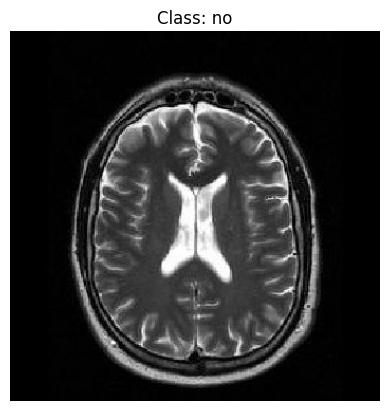

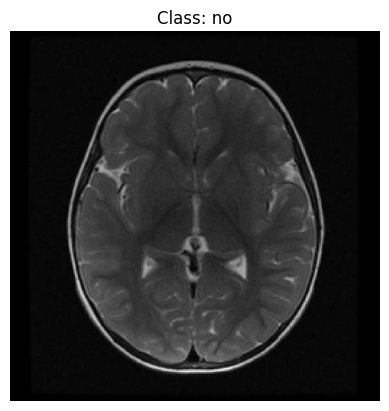

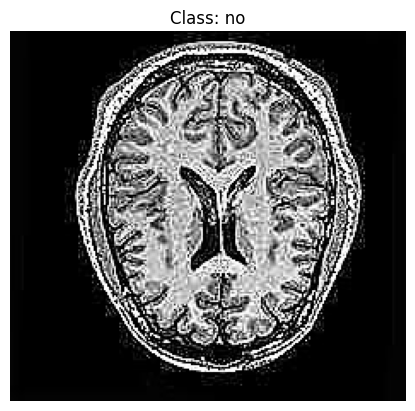

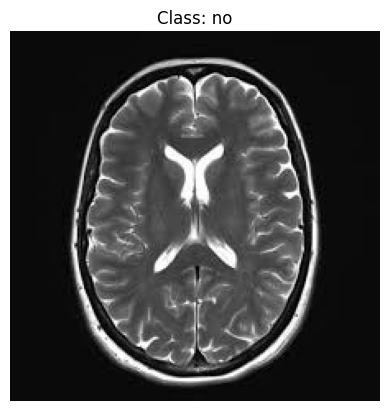

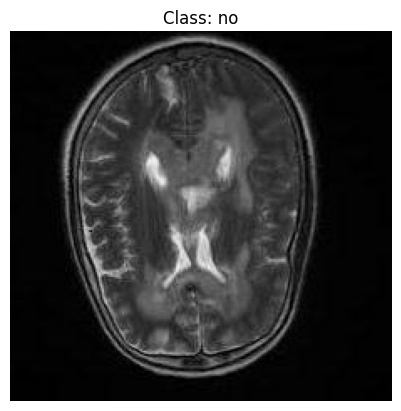

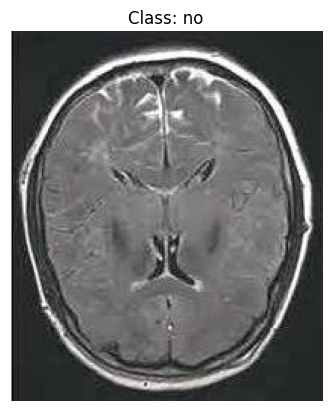

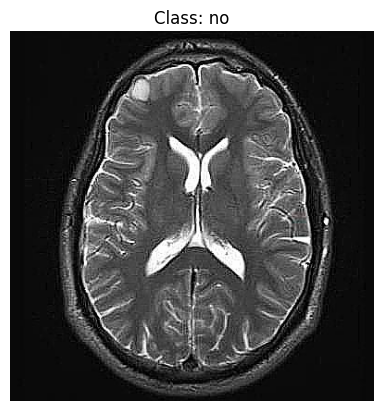

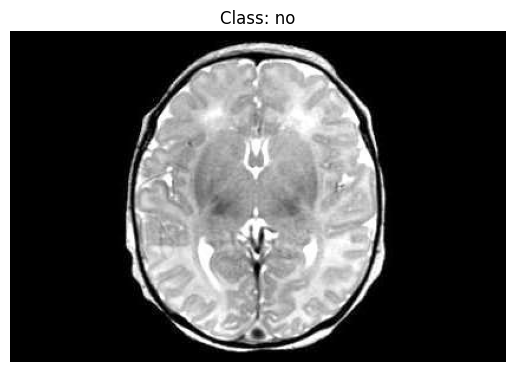

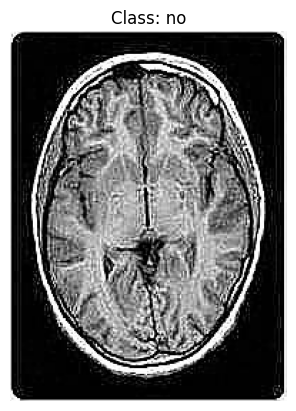

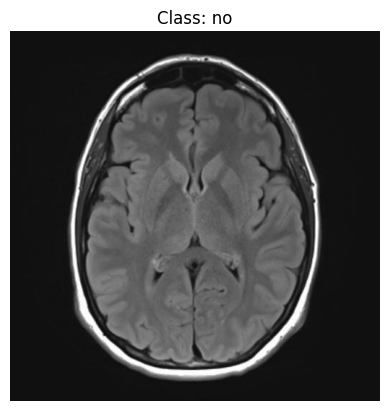

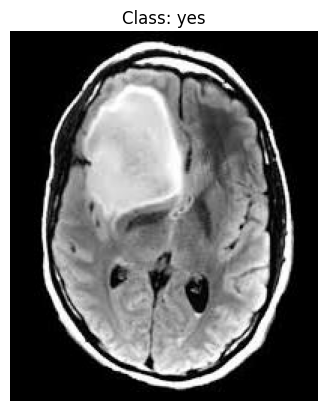

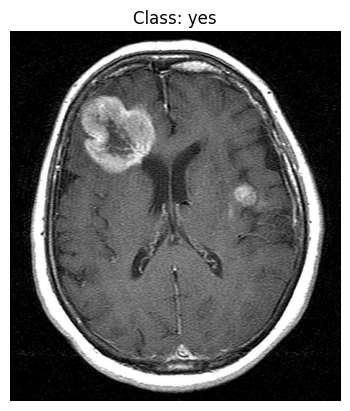

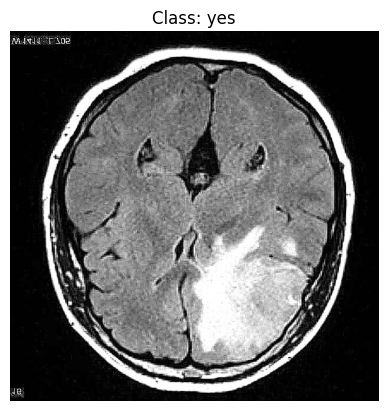

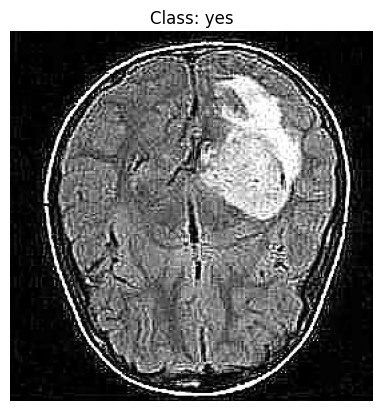

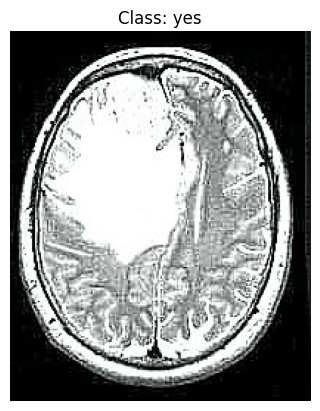

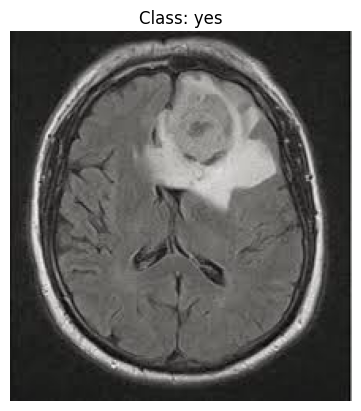

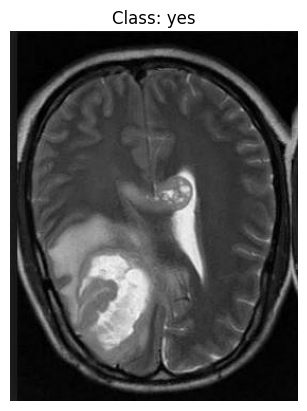

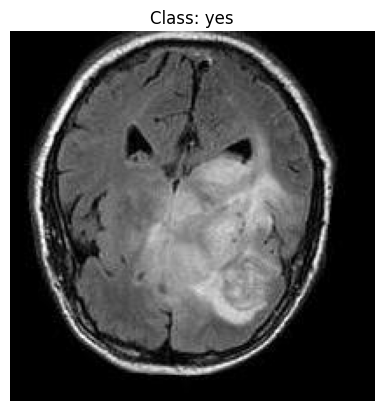

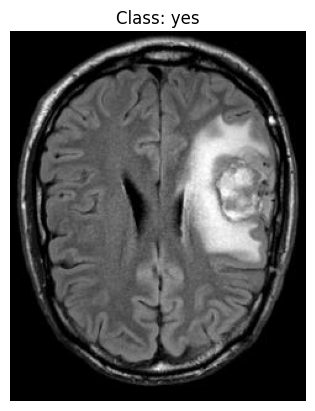

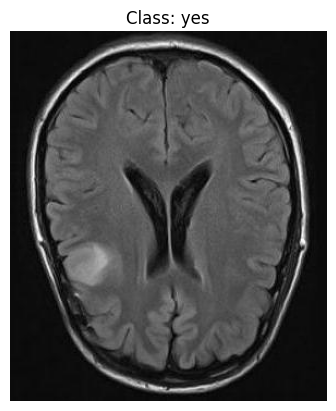

In [ ]:
import cv2
import matplotlib.pyplot as plt

train_folder = "/content/Brain_tumor_classification/train"

num_images = 10

class_labels = ["no","yes"]

for label in class_labels:
  class_folder = os.path.join(train_folder,label)
  image_files = os.listdir(class_folder)[:num_images]

  for image_file in image_files:
    image_path = os.path.join(class_folder,image_file)
    image = plt.imread(image_path)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Class: {label}")
    plt.axis('off')
    plt.show()






# Model Implementation


In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters=36, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))

model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='Adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

# Preprocessing data

In [ ]:
# import cv2
# import os

# # Set the path to the directory containing the images
# path = "/content/Brain_tumor_classification/train"  # Replace with the path to your dataset directory

# # Set the target size for the images
# target_size = (224, 224)

# # Iterate over the images in the dataset
# for class_name in ['yes', 'no']:
#   Dataset_path = os.path.join(path,class_name)
#   for filename in os.listdir(Dataset_path):
#       # Read the image
#       image_path = os.path.join(Dataset_path, filename)
#       image = cv2.imread(image_path)
#       if image is None:
#         print(f"Error reading image: {image_path}")
#         continue
              
#       # Resize the image to the target size
#       resized_image = cv2.resize(image, target_size)
      
#       # Save the resized image (optional)
#       resized_image_path = os.path.join(Dataset_path, "resized", filename)
#       cv2.imwrite(resized_image_path, resized_image)

In [ ]:
def preprocessing1(path):
  #input : path
  #output = preprocessed image

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip = True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image


In [ ]:
def preprocessing2(path):
  #input : path
  #output = preprocessed image

  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/Brain_tumor_classification/train"
train_data = preprocessing1(path)

Found 2100 images belonging to 2 classes.


In [ ]:
path = "/content/Brain_tumor_classification/val"
val_data = preprocessing2(path)

Found 450 images belonging to 2 classes.


In [ ]:
path = "/content/Brain_tumor_classification/test"
test_data = preprocessing2(path)

Found 450 images belonging to 2 classes.


# Early Stopping


In [ ]:
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience =3,verbose=1,mode='auto')

mc = ModelCheckpoint(monitor='val_accuracy', filepath='./bestmode.h5', verbose=1, save_best_only=True, mode='auto')

cd = [es,mc]

#Train the model

In [ ]:
total_train_samples = len(train_data.filenames)
total_val_samples = len(val_data.filenames)
batch_size = train_data.batch_size
epochs = 30

steps_per_epoch = total_train_samples // batch_size
validation_steps = total_val_samples // batch_size

history = model.fit(train_data, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, epochs=epochs, verbose=1, validation_data=val_data)



Epoch 1/30
65/65 [==============================] - 55s 611ms/step - loss: 0.6025 - accuracy: 0.6833 - val_loss: 0.4733 - val_accuracy: 0.7746
Epoch 2/30
65/65 [==============================] - 33s 512ms/step - loss: 0.4632 - accuracy: 0.7887 - val_loss: 0.3781 - val_accuracy: 0.8326
Epoch 3/30
65/65 [==============================] - 32s 495ms/step - loss: 0.4427 - accuracy: 0.8061 - val_loss: 0.5017 - val_accuracy: 0.7388
Epoch 4/30
65/65 [==============================] - 31s 478ms/step - loss: 0.3753 - accuracy: 0.8477 - val_loss: 0.6585 - val_accuracy: 0.6853
Epoch 5/30
65/65 [==============================] - 32s 486ms/step - loss: 0.3542 - accuracy: 0.8603 - val_loss: 0.3482 - val_accuracy: 0.8705
Epoch 6/30
65/65 [==============================] - 32s 493ms/step - loss: 0.2980 - accuracy: 0.8801 - val_loss: 0.3014 - val_accuracy: 0.8862
Epoch 7/30
65/65 [==============================] - 32s 488ms/step - loss: 0.2585 - accuracy: 0.8970 - val_loss: 0.2936 - val_accuracy: 0.8929

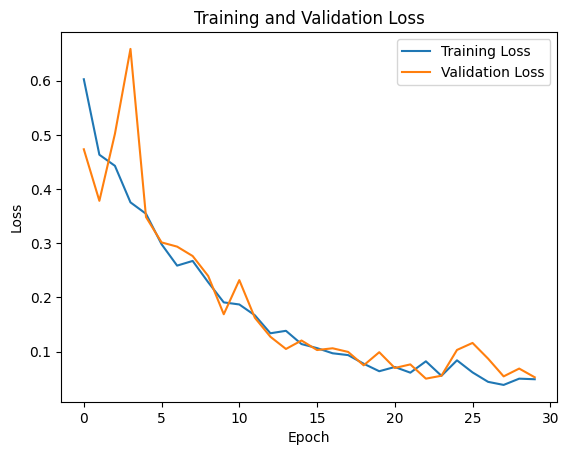

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

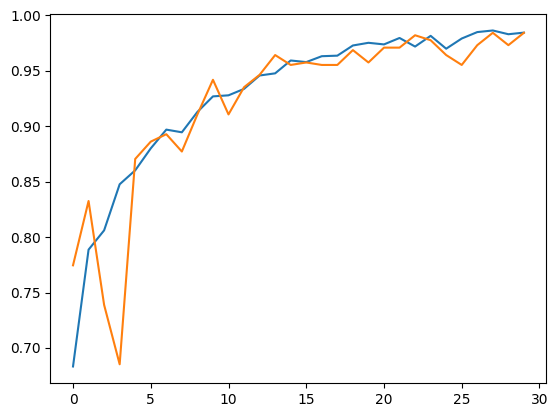

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.save("model.h5")

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

15/15 [==============================] - 3s 167ms/step - loss: 0.1297 - accuracy: 0.9756
